In [10]:
import numpy as np
from dtaidistance import dtw
import pandas as pd

def is_facing_left_right(nose, left_eye, right_eye):
    # Calculate midpoint of eyes
    eyes_midpoint = ((left_eye[0] + right_eye[0]) / 2, (left_eye[1] + right_eye[1]) / 2)
    
    # Calculate eye distance to set tolerance
    eye_distance = abs(right_eye[0] - left_eye[0])
    tolerance = eye_distance * 0.2  # 10% of eye distance as tolerance
    
    # Calculate horizontal direction (yaw)
    nose_offset = nose[0] - eyes_midpoint[0]
    
    # Use tolerance zone for forward position
    if abs(nose_offset) <= tolerance:
        return False
    elif nose_offset < -tolerance:
        return True
    else:
        return True

 


landmarks1 = pd.read_csv("dataset/1-frontViewTrimmed.csv")
landmarks2 = pd.read_csv("dataset/1-sideViewTrimmed.csv")
# Load data from both cameras
# Assume cam1_frames and cam2_frames are sequences of a chosen feature (e.g., wrist y-coordinate)
cam1_signal = np.array(landmarks1['19_y'])  # Shape: (N_frames_cam1,)
cam2_signal = np.array(landmarks1['19_y'])  # Shape: (N_frames_cam2,)

# Compute DTW alignment
distance, paths = dtw.warping_paths(cam1_signal, cam2_signal)
best_path = dtw.best_path(paths)

# For each frame in Camera 1, find the corresponding frame in Camera 2
alignment_map = {i: j for i, j in best_path}

# Example: Get Camera 2 frame aligned with Camera 1 frame 42
aligned_cam2_frame = alignment_map[42]

aligned_filtered_frames = []
for cam1_frame, cam2_frame in alignment_map.items():
    # Extract nose and eye positions for camera 1
    cam1_nose = (landmarks1.loc[cam1_frame, '0_x'], landmarks1.loc[cam1_frame, '0_y'])
    cam1_left_eye = (landmarks1.loc[cam1_frame, '2_x'], landmarks1.loc[cam1_frame, '2_y'])
    cam1_right_eye = (landmarks1.loc[cam1_frame, '5_x'], landmarks1.loc[cam1_frame, '5_y'])
    
    # Extract nose and eye positions for camera 2
    cam2_nose = (landmarks2.loc[cam2_frame, '0_x'], landmarks2.loc[cam2_frame, '0_y'])
    cam2_left_eye = (landmarks2.loc[cam2_frame, '2_x'], landmarks2.loc[cam2_frame, '2_y'])
    cam2_right_eye = (landmarks2.loc[cam2_frame, '5_x'], landmarks2.loc[cam2_frame, '5_y'])
    
    if is_facing_left_right(cam1_nose, cam1_left_eye, cam1_right_eye) and \
       is_facing_left_right(cam2_nose, cam2_left_eye, cam2_right_eye):
        aligned_filtered_frames.append((cam1_frame, cam2_frame))



In [11]:
print(aligned_filtered_frames)

[(14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (68, 68), (69, 69), (70, 70), (71, 71), (72, 72), (73, 73), (74, 74), (75, 75), (76, 76), (82, 82), (83, 83), (84, 84), (85, 85), (86, 86), (87, 87), (88, 88), (89, 89), (90, 90), (91, 91), (92, 92), (93, 93), (94, 94), (95, 95), (96, 96), (97, 97), (98, 98), (103, 103), (108, 108), (132, 132), (133, 133), (240, 240), (241, 241), (242, 242), (243, 243), (244, 244), (245, 245), (246, 246), (247, 247), (253, 253), (254, 254), (255, 255), (256, 256), (257, 257), (258, 258), (311, 311), (312, 312), (313, 313), (314, 314), (315, 315), (316, 316), (475, 475), (476, 476), (477, 477), (478, 478), (479, 479), (484, 484), (485, 485), (486, 486), (487, 487), (488, 488), (489, 489), (490, 490), (491, 4

In [ ]:
# For each frame in Camera 1, find the corresponding frame in Camera 2
alignment_map = {i: j for i, j in best_path}

# Example: Get Camera 2 frame aligned with Camera 1 frame 42
aligned_cam2_frame = alignment_map[42]

NameError: name 'cam1_frame_42' is not defined

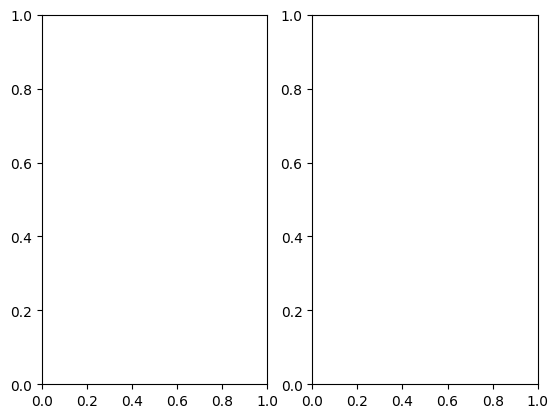

In [ ]:
import matplotlib.pyplot as plt

# Define a dummy load_image function (replace with actual image loading logic)
def load_image(frame):
	# Replace this with actual image loading logic
	return np.zeros((100, 100, 3))  # Dummy image

# Plot Camera 1 Frame 42 vs. Camera 2 Frame aligned_cam2_frame
fig, ax = plt.subplots(1, 2)
ax[0].imshow(load_image(cam1_frame_42))  # Replace with your image loader
ax[0].set_title("Camera 1 (Front)")
ax[1].imshow(load_image(cam2_frame_aligned))
ax[1].set_title("Camera 2 (Side)")
plt.show()

In [ ]:
def calculate_face_direction(nose, left_eye, right_eye):
    # Calculate midpoint of eyes
    eyes_midpoint = ((left_eye[0] + right_eye[0]) / 2, (left_eye[1] + right_eye[1]) / 2)
    
    # Calculate eye distance to set tolerance
    eye_distance = abs(right_eye[0] - left_eye[0])
    tolerance = eye_distance * 0.2  # 10% of eye distance as tolerance
    
    # Calculate horizontal direction (yaw)
    nose_offset = nose[0] - eyes_midpoint[0]
    
    # Use tolerance zone for forward position
    if abs(nose_offset) <= tolerance:
        yaw = "forward"
        return False
    elif nose_offset < -tolerance:
        yaw = "left"
        return True
    else:
        yaw = "right"
        return True

 

In [3]:
print(alignment_map.items())

dict_items([(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (68, 68), (69, 69), (70, 70), (71, 71), (72, 72), (73, 73), (74, 74), (75, 75), (76, 76), (77, 77), (78, 78), (79, 79), (80, 80), (81, 81), (82, 82), (83, 83), (84, 84), (85, 85), (86, 86), (87, 87), (88, 88), (89, 89), (90, 90), (91, 91), (92, 92), (93, 93), (94, 94), (95, 95), (96, 96), (97, 97), (98, 98), (99, 99), (100, 10

In [ ]:
# After alignment, filter frames where both cameras meet criteria
aligned_filtered_frames = []
for cam1_frame, cam2_frame in alignment_map.items():
    print(cam1_frame)
    if is_facing_left_right(cam1_frame) and is_facing_left_right(cam2_frame):
        aligned_filtered_frames.append((cam1_frame, cam2_frame))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27